# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's mulit-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [52]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [53]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

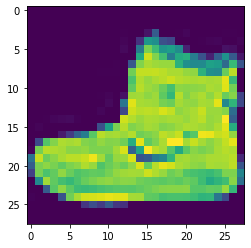

In [54]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [55]:
train_labels[7]

2

In [56]:
# Create a small list so we can index onto our training labels so they're human-redable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Bag')

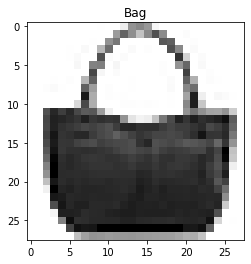

In [57]:
# Plot an example image and it label
index_of_choice = 100
plt.imshow(train_data[index_of_choice ], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

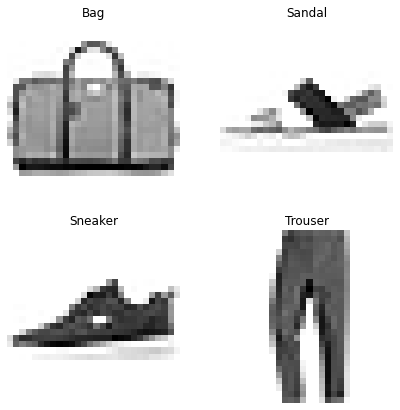

In [58]:
# Plot multiple random images of fashion MNSIT
import random
plt.figure(figsize =(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model
 For our multi-class classsification model, we can use a similar architecture to our binary classifiers, however, we're going tp have a tweak a few things: 
* Input shape =28 x 28 (the shape of one image)
* output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * if your labels are one-hot encoded use categoricalCrossentropy()
    * if your labels are integer form use SparseCategoricalCrossentropy()
* output layer activation = Softmax(not sigmoid)

In [59]:
# Set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape =(28,28)), 
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(10, activation= 'softmax')
])

# Complile the model
model.compile( loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
non_norm_history = model.fit(train_data,
                    tf.one_hot(train_labels, depth = 10),
                    epochs = 10,
                    validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 2s 870us/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 1s 796us/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 2s 931us/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 2s 869us/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 1s 790us/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 1s 796us/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - v

In [60]:
# Check the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Check the min and max values of the trainng data
train_data.min(), train_data.max()

(0, 255)

**Neural Networks prefer to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.** 

In [62]:
# We can get out training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [63]:
# Now our data is normalised, let's build a model to find patterns in it

# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model above)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# fit the model
norm_history = model_2.fit(train_data_norm,
                          train_labels,
                          epochs = 10,
                          validation_data= (test_data_norm,
                                           test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 841us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - v

**Note:** Neural Network tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1) 

<AxesSubplot:title={'center':'Normallized data'}>

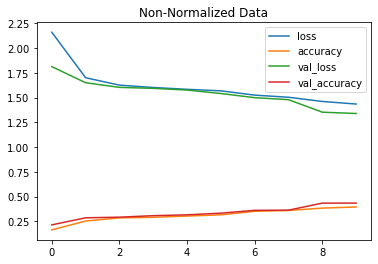

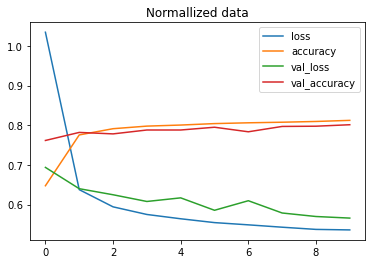

In [64]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'Non-Normalized Data')
# plot normalized data loss curves 
pd.DataFrame(norm_history.history).plot(title = 'Normallized data')

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on same criteria(e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate 


In [65]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model above)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))
# fit the model
find_lr_history = model_3.fit(train_data_norm,
                          train_labels,
                          epochs = 40,
                          validation_data= (test_data_norm, test_labels),
                            callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 837us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 848us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 2s 831us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 941us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 2s 830us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 2s 851us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - v

Text(0.5, 1.0, 'Finding the ideal learning rate ')

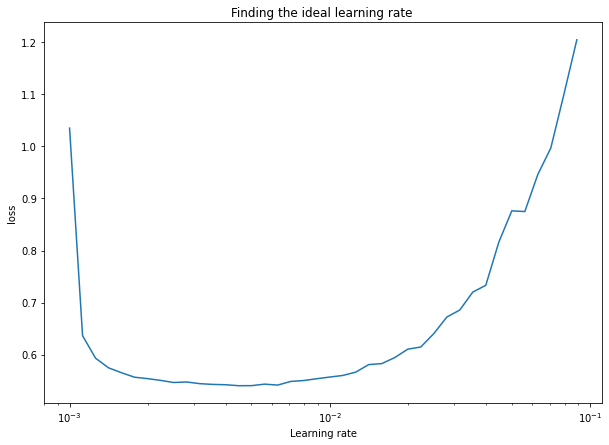

In [66]:
# plot hte learing rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10** (tf.range(40)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate ')

In [76]:
# Let's refit the model with ideal learning rate
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model above)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. Compile the model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr= 0.001),
               metrics = ['accuracy'])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))
# fit the model
history_4 = model_4.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data= (test_data_norm, test_labels),
                            callbacks = [lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 809us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/20
1875/1875 [==============================] - 1s 776us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/20
1875/1875 [==============================] - 1s 782us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/20
1875/1875 [==============================] - 1s 774us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 1s 784us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val

## Evaluating our multi-class classification model

To evaluate our multi-classification model we could do:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by tracking it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [85]:
import numpy as np
from sklearn.metrics import confusion_matrix

import itertools

figsize = (10,10)

def make_confusion_matrix(y_true, y_preds, classes =None, figsize =(10,10), text_size= 15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_preds)
    cm_norm = cm.astype('float')/ cm.sum(axis =1)[:, np.newaxis] #normalize our confusion matrix
    n_classes = cm.shape[0]

    #Let's prettify 
    fig, ax = plt.subplots(figsize = figsize)
    cax = ax.matshow(cm, cmap = plt.cm.Blues )
    fig.colorbar(cax)


    # Set label to be classes
    if classes:
        labels = classes
    else :
        labels = np.arange(cm.shape[0])

    # labels the axis
    ax.set(title = 'confusion_matrix',
            xlabel = 'predictions',
           ylabel = 'True labels',
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # set threshold for different colours 
    threshold = (cm.max() +cm.min()) /2.

    #plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment = "center",
                color ='white' if cm[i, j] > threshold else "black",
                size = 15)

In [86]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [87]:
# Make some predictions with our model
y_probs = model_4.predict(test_data_norm)

# view the first 5 predictions
y_probs[:5]

array([[8.9690988e-10, 5.1861118e-08, 8.0163300e-06, 6.0599887e-06,
        1.0200269e-05, 5.6291662e-02, 6.6273458e-08, 6.1132293e-02,
        1.8405735e-03, 8.8071102e-01],
       [1.3786008e-05, 2.0895006e-17, 9.0092188e-01, 2.5244167e-06,
        6.0517255e-02, 8.8984225e-15, 3.8337883e-02, 1.5817463e-30,
        2.0672458e-04, 1.8360635e-21],
       [1.0579984e-04, 9.8654872e-01, 6.2062040e-06, 1.3050229e-02,
        1.8633090e-04, 3.4911592e-12, 9.8731194e-05, 1.9822528e-08,
        3.5131432e-06, 3.2814731e-07],
       [2.7034803e-06, 9.9445629e-01, 1.9696731e-06, 5.1296116e-03,
        2.4960126e-04, 2.6996936e-11, 1.7383323e-05, 7.9016831e-07,
        1.9396762e-06, 1.3966275e-04],
       [2.8380233e-01, 1.0506727e-05, 9.5871568e-02, 2.1328496e-02,
        3.7533928e-02, 7.4086977e-13, 5.6125551e-01, 1.4625802e-18,
        1.9764407e-04, 2.5044481e-15]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trained on(e.g. if you model is trained on normalized data, you'll make predictions on normalized data)

In [88]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.9690988e-10, 5.1861118e-08, 8.0163300e-06, 6.0599887e-06,
        1.0200269e-05, 5.6291662e-02, 6.6273458e-08, 6.1132293e-02,
        1.8405735e-03, 8.8071102e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [89]:
class_names[7]

'Sneaker'

In [90]:
# Convert all the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[860,   7,  17,  63,   2,   0,  38,   0,  12,   1],
       [  3, 952,   4,  29,   5,   4,   3,   0,   0,   0],
       [ 49,   4, 651,  12, 172,   2,  99,   0,  11,   0],
       [ 84,  19,  11, 823,  22,   1,  27,   2,  11,   0],
       [  5,   1,  96,  41, 762,   3,  87,   0,   5,   0],
       [  0,   2,   0,   0,   0, 862,   0,  79,   8,  49],
       [257,   5, 142,  47, 142,   5, 389,   0,  13,   0],
       [  0,   0,   0,   0,   0,  23,   0, 919,   1,  57],
       [ 15,   1,  36,  16,   3,   3,   5,   5, 916,   0],
       [  0,   4,   0,   0,   1,   7,   0,  37,   3, 948]], dtype=int64)

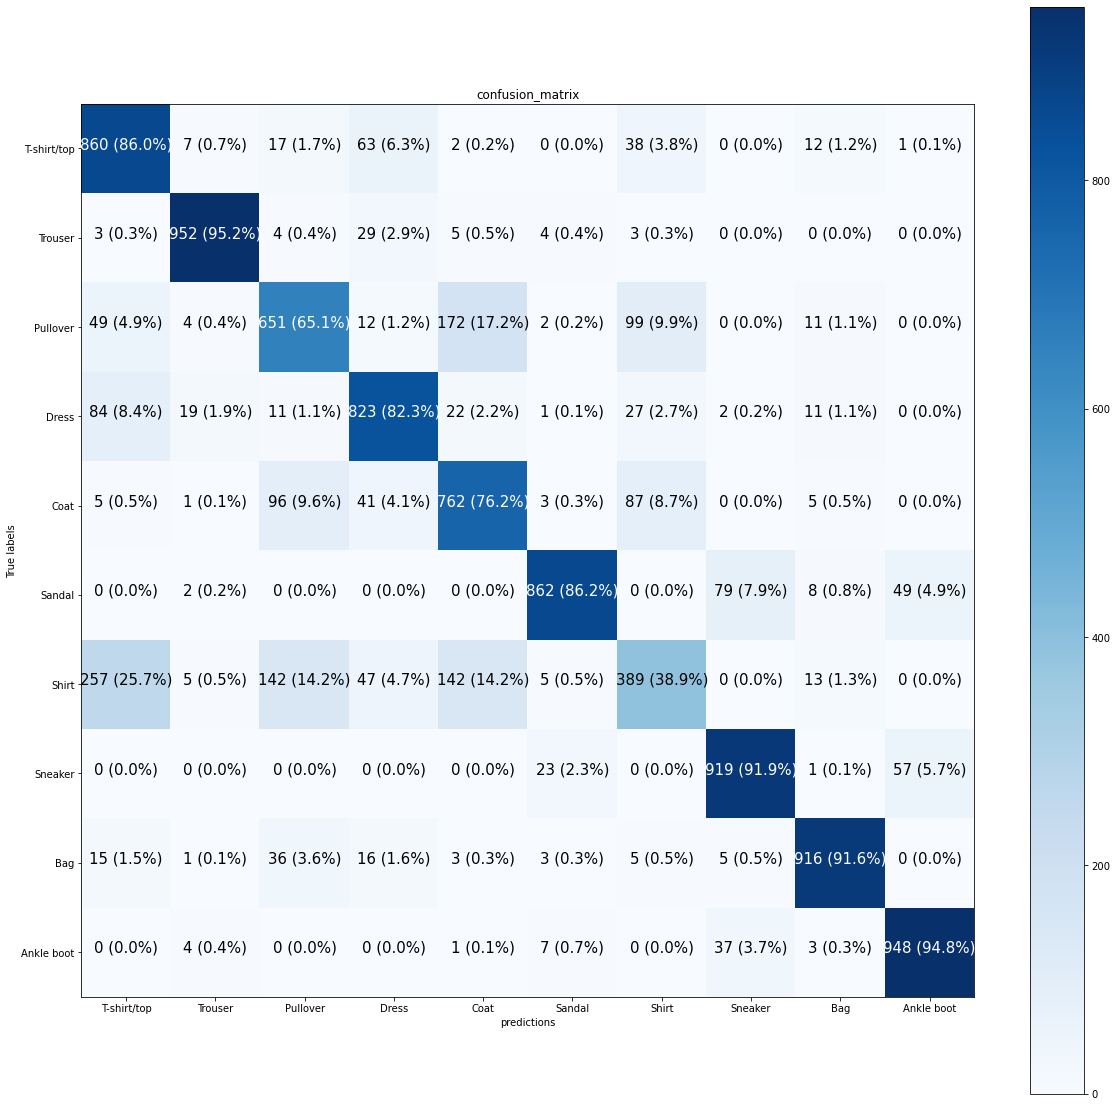

In [95]:
# Make a prettier confusion matrix
make_confusion_matrix(test_labels,
                     y_preds,
                     class_names,
                     figsize =(20,20),
                     text_size=7)

# What patterns is our model learnming ?

In [97]:
# Find the layers of our most recent model
model_4.layers

In [98]:
# Extract a particular layer
model_4.layers[1]

In [100]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes 
weights, weights.shape

(array([[ 3.0888999 , -2.4215217 ,  0.4418051 , -3.0614772 ],
        [ 0.9838694 , -2.7353764 , -0.34102052, -1.1591091 ],
        [ 2.6268573 , -1.6986006 , -2.6450655 , -2.345211  ],
        ...,
        [-0.54319996,  2.1052063 , -0.21971586,  0.74242395],
        [-0.5939364 ,  3.3332582 ,  1.4414951 , -1.5162399 ],
        [ 0.9036092 , -0.6189761 ,  0.6396339 ,  0.06326729]],
       dtype=float32),
 (784, 4))

In [101]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...



In [103]:
biases, biases.shape

(array([ 2.1480203 ,  0.45255148, -0.38970652,  2.9055943 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (atleast in case of a TesnorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

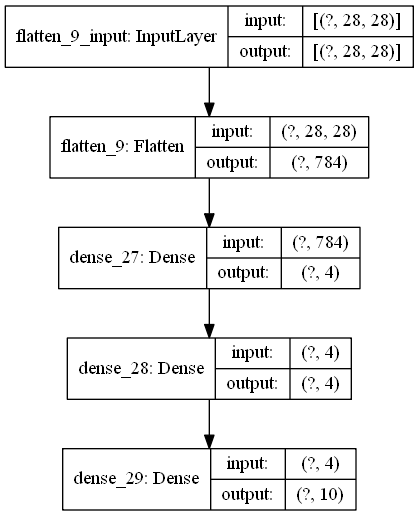

In [104]:
# Let's check out the another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)